In [1]:
!python -V

Python 3.11.11


In [4]:
import torch

In [3]:
print(torch.__version__)

2.5.1+cu124


In [28]:
torch.cuda.is_available()

True

# Pre-Trained Networks

## A CNN trained in ImageNet

ImageNet comprises of over 14 million labeled images by Standford University. The labels are coming with a hierarchy of nouns coming from WordNet(a large lexical database of English Language).

Image Classification

Object Localization: Identifying Objects Position

Object Detection: Identifying and Labeling Objects in Images

Scene Classification: Classifying a situation in the Image

Scene Parsing/Semantic Scene Segmentation

In [5]:
# Import predefined models
from torchvision import models

In [6]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

AlexNet was a defining moment in 2012 for computer vision
Top-X error rate is that the correct label must be in the top 5 predictions

In [7]:
# This is a class instance of the original AlexNet architecture but with no pre-trained weights.
alexnet = models.AlexNet()

In [8]:
# An instance of 101-layer convolutional neural network with pre-trained weight loading
resnet = models.resnet101(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 110MB/s]


In [9]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
)])

In [13]:
!pip install --upgrade Pillow

In [12]:
# PIL is an image handling utilitiy in Python
# Download the bobby dog image from the Github Repo listed in the book
from PIL import Image
img = Image.open("bobby.jpg")

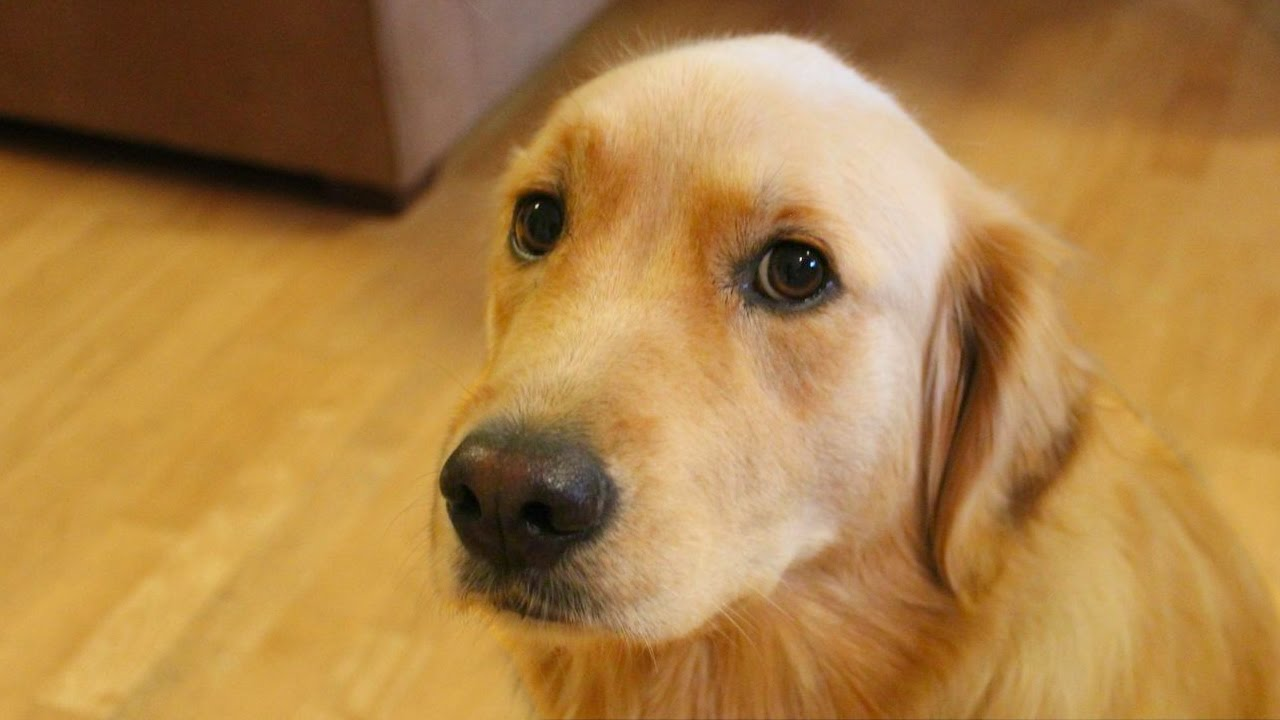

In [13]:
img

In [14]:
img_t = preprocess(img)

In [15]:
img_t

tensor([[[-0.6281, -0.6452, -0.6623,  ...,  0.0056, -0.0287, -0.0629],
         [-0.7137, -0.6965, -0.6965,  ...,  0.0227,  0.0227,  0.0056],
         [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0741,  0.0569],
         ...,
         [ 1.4440,  1.4269,  1.4783,  ...,  0.6049,  0.6221,  0.6906],
         [ 1.4269,  1.4440,  1.4783,  ...,  0.6906,  0.6734,  0.7077],
         [ 1.4612,  1.4783,  1.5297,  ...,  0.6906,  0.7248,  0.7591]],

        [[-1.2829, -1.2829, -1.2829,  ..., -0.6352, -0.6702, -0.7052],
         [-1.2654, -1.2654, -1.2654,  ..., -0.6176, -0.6527, -0.7052],
         [-1.2479, -1.2479, -1.2654,  ..., -0.6176, -0.6001, -0.6527],
         ...,
         [ 0.7829,  0.8004,  0.8704,  ..., -0.2850, -0.2675, -0.2150],
         [ 0.7654,  0.8354,  0.9055,  ..., -0.2150, -0.2150, -0.1625],
         [ 0.8004,  0.8529,  0.9230,  ..., -0.1800, -0.1275, -0.0749]],

        [[-1.4907, -1.4559, -1.4210,  ..., -1.0376, -1.0898, -1.1421],
         [-1.5081, -1.4559, -1.4210,  ..., -1

In [16]:
batch_t = torch.unsqueeze(img_t,0)

In [17]:
batch_t

tensor([[[[-0.6281, -0.6452, -0.6623,  ...,  0.0056, -0.0287, -0.0629],
          [-0.7137, -0.6965, -0.6965,  ...,  0.0227,  0.0227,  0.0056],
          [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0741,  0.0569],
          ...,
          [ 1.4440,  1.4269,  1.4783,  ...,  0.6049,  0.6221,  0.6906],
          [ 1.4269,  1.4440,  1.4783,  ...,  0.6906,  0.6734,  0.7077],
          [ 1.4612,  1.4783,  1.5297,  ...,  0.6906,  0.7248,  0.7591]],

         [[-1.2829, -1.2829, -1.2829,  ..., -0.6352, -0.6702, -0.7052],
          [-1.2654, -1.2654, -1.2654,  ..., -0.6176, -0.6527, -0.7052],
          [-1.2479, -1.2479, -1.2654,  ..., -0.6176, -0.6001, -0.6527],
          ...,
          [ 0.7829,  0.8004,  0.8704,  ..., -0.2850, -0.2675, -0.2150],
          [ 0.7654,  0.8354,  0.9055,  ..., -0.2150, -0.2150, -0.1625],
          [ 0.8004,  0.8529,  0.9230,  ..., -0.1800, -0.1275, -0.0749]],

         [[-1.4907, -1.4559, -1.4210,  ..., -1.0376, -1.0898, -1.1421],
          [-1.5081, -1.4559, -

In [18]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [19]:
out = resnet(batch_t)

In [20]:
out

tensor([[-3.4997e+00, -1.6490e+00, -2.4391e+00, -3.2243e+00, -3.2465e+00,
         -1.3218e+00, -2.0395e+00, -2.5405e+00, -1.3043e+00, -2.8827e+00,
         -1.6696e+00, -1.2838e+00, -2.6184e+00, -2.9750e+00, -2.4380e+00,
         -2.8256e+00, -3.3083e+00, -7.9667e-01, -6.7075e-01, -1.2162e+00,
         -3.0311e+00, -3.9593e+00, -2.2631e+00, -1.0843e+00, -9.7915e-01,
         -1.0742e+00, -3.0908e+00, -2.4751e+00, -2.2153e+00, -3.1932e+00,
         -3.2964e+00, -1.8507e+00, -2.0642e+00, -2.1202e+00, -1.8665e+00,
         -3.2375e+00, -1.1210e+00, -1.1321e+00, -1.1657e+00, -9.0361e-01,
         -4.5209e-01, -1.4986e+00,  1.4366e+00,  1.2994e-01, -1.8379e+00,
         -1.4815e+00,  9.7278e-01, -9.3662e-01, -3.0276e+00, -2.7341e+00,
         -2.5960e+00, -2.0591e+00, -1.8170e+00, -1.9437e+00, -1.7875e+00,
         -1.3029e+00, -4.5200e-01, -2.0560e+00, -3.2882e+00, -4.7583e-01,
         -3.6261e-01, -1.1650e+00, -7.3943e-01, -1.4489e+00, -1.5039e+00,
         -2.1096e+00, -1.7095e+00, -4.

In [21]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [22]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [23]:
_,index = torch.max(out,1)

In [24]:
index

tensor([207])

In [25]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100

In [26]:
labels[index[0]],percentage[index[0]].item()

('golden retriever', 96.57182312011719)

In [27]:
_,indices = torch.sort(out,descending=True)

In [28]:
[(labels[idx],percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.57182312011719),
 ('Labrador retriever', 2.608267307281494),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2699618339538574),
 ('redbone', 0.17958912253379822),
 ('tennis ball', 0.10991954803466797)]

## Pre-trained GAN

Generator and and discriminator game

Cycle GAN: The fun part is that at this point, we don’t need matched horse/zebra pairs as
ground truths (good luck getting them to match poses!). It’s enough to start from a
collection of unrelated horse images and zebra photos for the generators to learn
their task, going beyond a purely supervised setting. The implications of this model go
even further than this: the generator learns how to selectively change the appearance
of objects in the scene without supervision about what’s what. There’s no signal indicating that manes are manes and legs are legs, but they get translated to something
that lines up with the anatomy of the other animal.

CycleGAN has been trained on the same ImageNet dataset with unrelated horse and zebra images


In [29]:
# Copied from the Github Repo

import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3>

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [30]:
netG = ResNetGenerator()

In [31]:
model_path = 'horse2zebra_0.4.0.pth'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<ipython-input-31-cf411f8f0bf1>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(model_path)


<All keys matched successfully>

In [32]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [33]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [34]:
img = Image.open("horse.jpg")
img

Output hidden; open in https://colab.research.google.com to view.

In [39]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t,0)

In [40]:
batch_out = netG(batch_t)

In [41]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0

out_img = transforms.ToPILImage()(out_t)

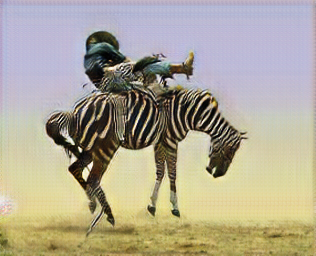

In [42]:
out_img

In [43]:
out_img.save("zebra.jpg")

## Image Captioning Network/NueralTalk2

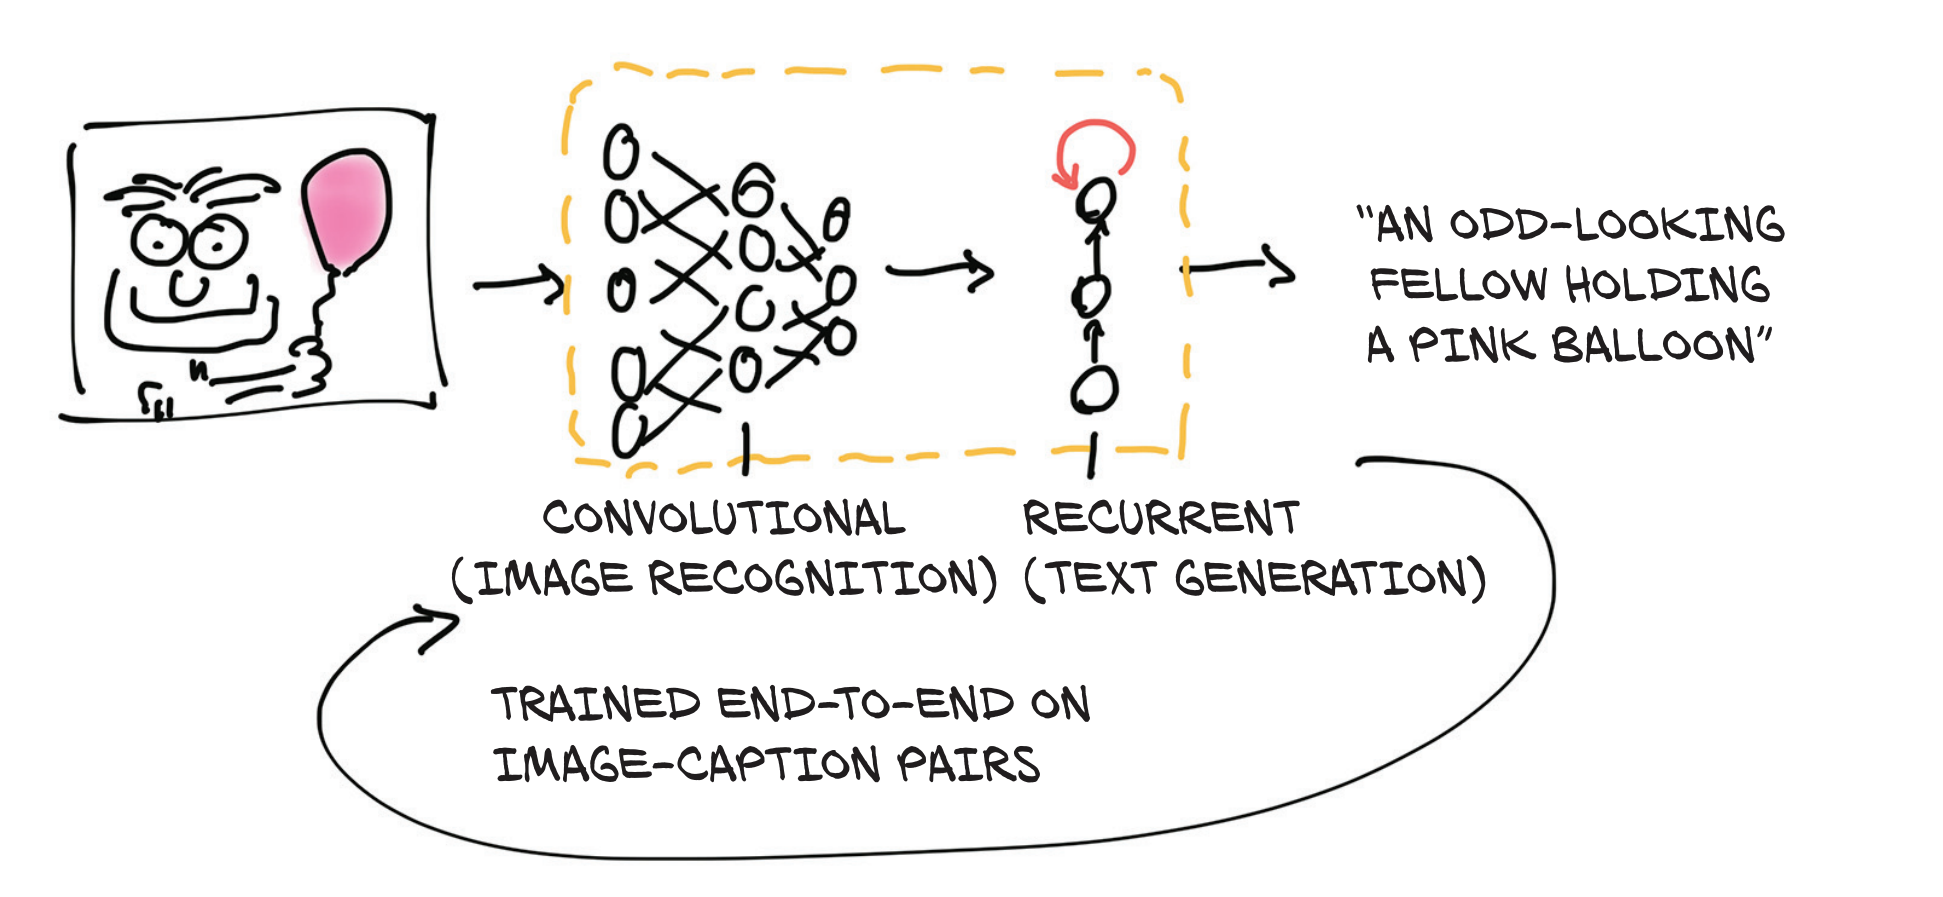

## Torchvision and Torch Hub for Loading pretrained Models and Architectures

TorchVision is an interface to pretrained models in pytorch.

PyTorch 1.0 saw the introduction of Torch Hub, which is a mechanism through
which authors can publish a model on GitHub, with or without pretrained weights,
and expose it through an interface that PyTorch understands. This makes loading a
pretrained model from a third party as easy as loading a TorchVision model.

All it takes for an author to publish a model through the Torch Hub mechanism is
to place a file named hubconf.py in the root directory of the GitHub repository. The
file has a very simple structure:

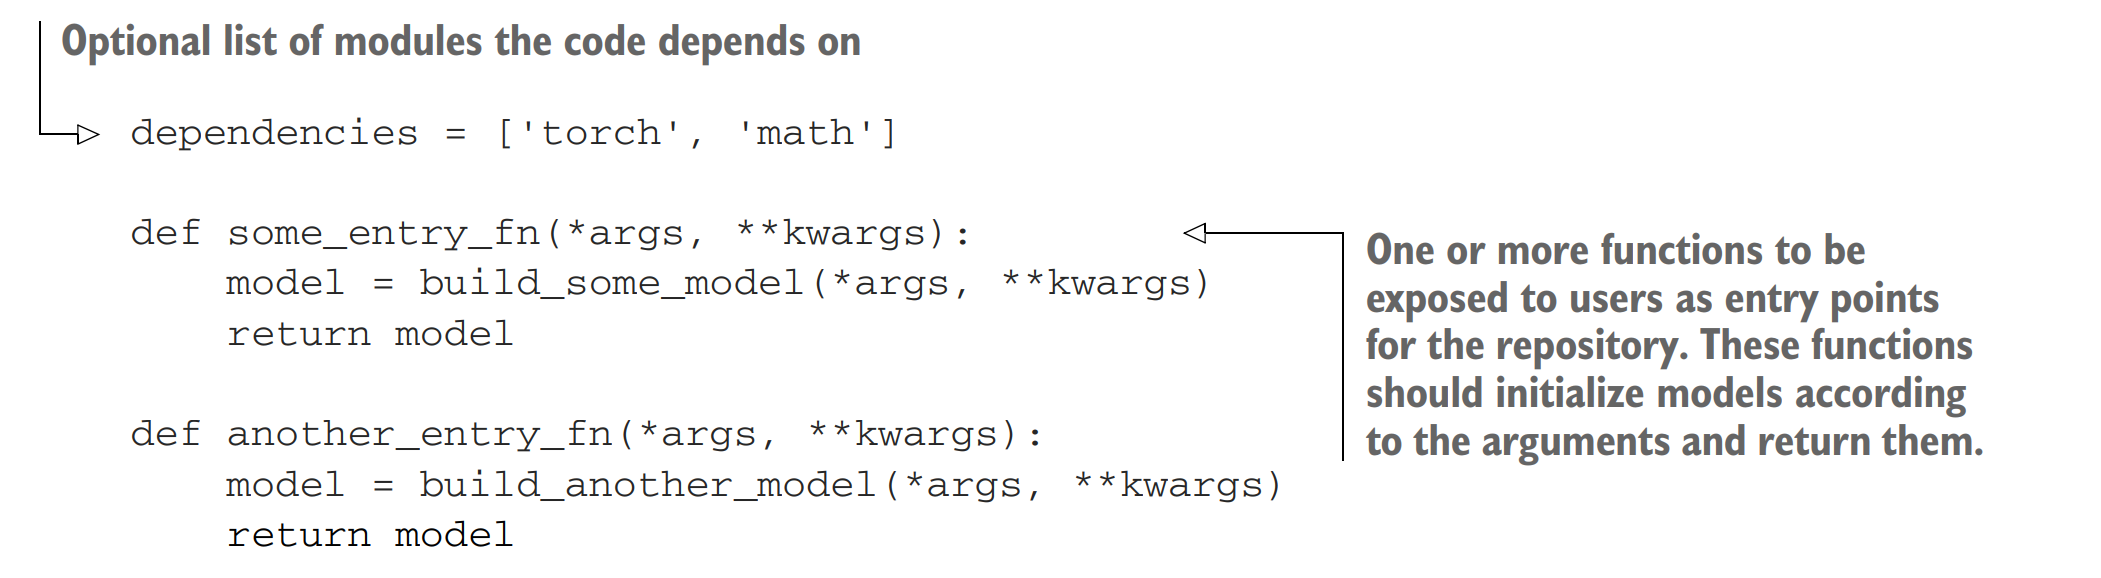

*args is used to pass a variable number of positional arguments to a function and collects the positional arguments into a tuple name args inside the function.

**kwargs is used to a variable number of keyword arguments to a function. It collects all the keyword arguments into a dict item inside the function.

These features make your functions more flexible, allowing them to handle varying numbers and types of inputs. They're especially useful when you're not sure in advance how many arguments will be passed to the function.

we can now search for GitHub repositories that include hubconf.py, and we’ll know right away that we can load them using
the torch.hub module.

In [44]:
from torch import hub

In [46]:
resent18_model = hub.load("pytorch/vision", "resnet18", pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 168MB/s]


## Exercises

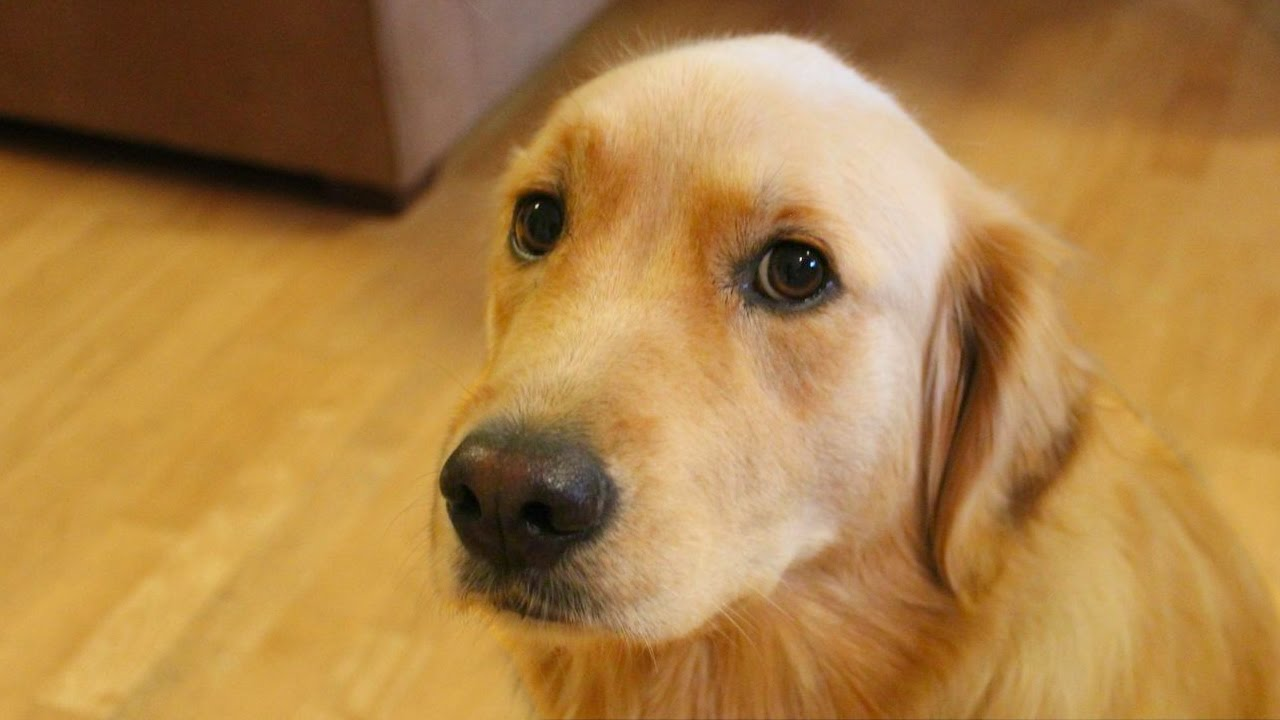

In [47]:
img = Image.open("bobby.jpg")
img

In [48]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor()
])

In [49]:
img_t = preprocess(img)
img_t

tensor([[[0.2980, 0.3059, 0.3020,  ..., 0.4549, 0.4627, 0.4588],
         [0.2980, 0.3059, 0.3059,  ..., 0.4588, 0.4627, 0.4549],
         [0.3137, 0.3176, 0.3098,  ..., 0.4549, 0.4588, 0.4549],
         ...,
         [0.8471, 0.8431, 0.8392,  ..., 0.6824, 0.6980, 0.7020],
         [0.8471, 0.8431, 0.8392,  ..., 0.6784, 0.6863, 0.6980],
         [0.8471, 0.8431, 0.8392,  ..., 0.6471, 0.6588, 0.6667]],

        [[0.1686, 0.1765, 0.1725,  ..., 0.3137, 0.3137, 0.3059],
         [0.1529, 0.1647, 0.1647,  ..., 0.3216, 0.3216, 0.3137],
         [0.1569, 0.1647, 0.1569,  ..., 0.3255, 0.3255, 0.3216],
         ...,
         [0.6510, 0.6471, 0.6431,  ..., 0.4627, 0.4706, 0.4745],
         [0.6510, 0.6471, 0.6431,  ..., 0.4706, 0.4745, 0.4863],
         [0.6510, 0.6471, 0.6431,  ..., 0.4471, 0.4588, 0.4667]],

        [[0.0745, 0.0706, 0.0510,  ..., 0.1843, 0.2000, 0.2000],
         [0.0588, 0.0588, 0.0510,  ..., 0.1804, 0.1922, 0.1882],
         [0.0627, 0.0627, 0.0471,  ..., 0.1725, 0.1804, 0.

In [50]:
batch_t = torch.unsqueeze(img_t,0)

batch_out = netG(batch_t)

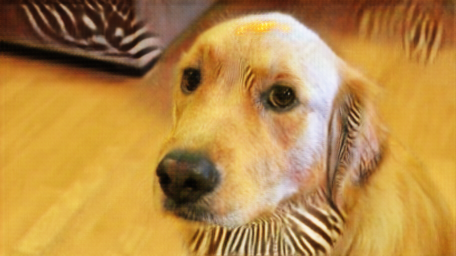

In [51]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0

out_img = transforms.ToPILImage()(out_t)

out_img

# Summary of the Chapter

A pretrained network is a model that has already been trained on a dataset.
Such networks can typically produce useful results immediately after loading
the network parameters.

By knowing how to use a pretrained model, we can integrate a neural network
into a project without having to design or train it.

AlexNet and ResNet are two deep convolutional networks that set new benchmarks for image recognition in the years they were released.

Generative adversarial networks (GANs) have two parts—the generator and the
discriminator—that work together to produce output indistinguishable from
authentic items.

CycleGAN uses an architecture that supports converting back and forth
between two different classes of images.

NeuralTalk2 uses a hybrid model architecture to consume an image and produce a text description of the image.

Torch Hub is a standardized way to load models and weights from any project
with an appropriate hubconf.py file.